# Разбор leetcode задач с собеседований

Добро пожаловать в этот Jupyter Notebook! Если вы готовитесь к собеседованиям на роль Data Scientist, этот материал может быть для вас полезным.

## Что вы найдете в этом ноутбуке:

1. **Реальные задачи с собеседований:** Все задачи, представленные здесь, были собраны с реальных собеседований
2. **Ссылки на LeetCode:** Для задач, которые похожи на задачи с LeetCode, я предоставляю прямые ссылки. Если задача сильно отличается, я указываю различия и разбираю её отдельно.
3. **Варианты решений:** Для каждой задачи я предлагаю несколько вариантов решения, включая решения с использованием встроенных функций, где это возможно.
4. **Тесты производительности:** Я также провожу тесты производительности для различных вариантов решения, чтобы вы могли оценить их эффективность.

Цель этого ноутбука - помочь вам лучше подготовиться к собеседованиям, дать понимание типов задач, которые могут быть заданы, и предложить эффективные методы их решения. Удачи в подготовке!


In [1]:
import time
import random

import numpy as np
import itertools
from collections import Counter

import matplotlib.pyplot as plt

from typing import List

In [2]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

### Задача 1
Даны интервалы, отсортируйте их пожалуйста по возрастанию длины. 

Пример  
Вход: [(2, 8), (-1, 0.2), (14, 15.3), (-4, -1.5), (1, 7), (1, 7), (0,0)]  
Выход: [(-1, 0.2), (14, 15.3), ..., (2, 8)]  

***задача с собеса Яндекса, соответствующая задача на литкод не найдена***

**Решение задачи 1 вариант 1**: с помощью встроенной функции sorted

In [3]:
def dist(i):
    return abs(i[1] - i[0])

In [4]:
def my_sort(l):
    return sorted(l, key=dist)

In [5]:
list_intervals = [(2, 8), (-1, 0.2), (14, 15.3), (-4, -1.5), (1, 7), (1, 7), (0,0)]
my_sort(list_intervals)

[(0, 0), (-1, 0.2), (14, 15.3), (-4, -1.5), (2, 8), (1, 7), (1, 7)]

далее обычно следует чтото типа того:  
Представим, что у нас нет sorted (collections, itertools, set.intersection **выберите из списка нужный вариант**),  
случилась война и стандартные библиотеки питона погибли,  
остались в живых только int, bool, for, range, if и while

**Решение задачи 1 вариант 2**: без функции sorted сортировка пузырьковым методом

In [6]:
def my_bubble_sort2(l):
    n = len(l)
    for i in range(n):
        shifted = False
        for j in range(n - 1 - i):
            if dist(l[j]) > dist(l[j + 1]):
                l[j], l[j + 1] = l[j + 1], l[j]
                shifted = True

        if not shifted:
            break

    return l

In [7]:
list_intervals = [(2, 8), (-1, 0.2), (14, 15.3), (-4, -1.5), (1, 7), (1, 7), (0,0)]
my_bubble_sort2(list_intervals[:])

[(0, 0), (-1, 0.2), (14, 15.3), (-4, -1.5), (2, 8), (1, 7), (1, 7)]

In [8]:
my_bubble_sort2(list_intervals[:]) == my_sort(list_intervals[:])

True

Алгоритм сортировки пузырьком имеет следующую трудоёмкость:

1. **Лучший случай** (когда массив уже отсортирован): $O(n)$
   В этом случае после первого прохода не будет произведено ни одной замены, и алгоритм может быть остановлен.

2. **Средний случай**: $O(n^2)$
   В среднем случае (как и в большинстве других случаев) потребуется $O(n^2)$ операций.

3. **Худший случай** (когда массив отсортирован в обратном порядке): $O(n^2)$
   В худшем случае для каждого из $n$ элементов потребуется проверить остальные $n$ элементов.

Таким образом, средняя и максимальная трудоёмкость алгоритма сортировки пузырьком составляют $O(n^2)$.


**Решение задачи 1 вариант 3**: без функции sorted сортировка вставками

In [9]:
def my_insertion_sort3(l):
    for i in range(1, len(l)):
        key = l[i]
        j = i - 1
        while j >= 0 and dist(l[j + 1]) < dist(l[j]):
            l[j + 1] = l[j]
            j -= 1
        l[j + 1] = key
    return l

In [10]:
my_insertion_sort3(list_intervals[:])

[(-1, 0.2), (14, 15.3), (-4, -1.5), (2, 8), (1, 7), (0, 0), (1, 7)]

Трудоёмкость сортировки вставками:

- **Лучший случай**: $O(n)$ - когда список уже отсортирован.
- **Средний случай**: $O(n^2)$.
- **Худший случай**: $O(n^2)$ - когда список отсортирован в обратном порядке.

Пространственная сложность: 
- $O(1)$ - так как алгоритм является сортировкой на месте и не требует дополнительной памяти.


**Тест производительности - Задача 1**:

In [11]:
def generate_intervals(n, lower_bound=-100, upper_bound=100):
    '''
    generates a list of n random intervals with integer boundaries
    each boundary of interval is generated from range [lower_bound, upper_bound]
    '''
    intervals = []
    for _ in range(n):
        start, end = sorted([random.randint(lower_bound, upper_bound) for _ in range(2)])
        intervals.append((start, end))
    return intervals


In [12]:
test_list_intervals = generate_intervals(100)
print(test_list_intervals[:10])

[(-72, 63), (-94, 89), (-38, -30), (-65, -43), (-74, 88), (73, 89), (-78, 39), (8, 51), (-93, -92), (-77, -45)]


In [13]:
%timeit -n 500  my_sort(test_list_intervals[:])

25.4 µs ± 3.13 µs per loop (mean ± std. dev. of 7 runs, 500 loops each)


In [14]:
%timeit -n 500  my_bubble_sort2(test_list_intervals[:])

2.42 ms ± 227 µs per loop (mean ± std. dev. of 7 runs, 500 loops each)


In [15]:
%timeit -n 500  my_insertion_sort3(test_list_intervals[:])

135 µs ± 32.6 µs per loop (mean ± std. dev. of 7 runs, 500 loops each)


Вывод по тесту производительности - Задача 1:  
без встроенных функций код медленнее примерно в 4 раза. Но также вариант сортировки пузырьком оказался в 20 раз медленнее сортировки вставками. Пузырьковая сортировка требует дополнительных операций обмена, которые могут добавлять оверхед, особенно при работе с большими списками. И даже если вы удалите отпимизацию с shifted на случай если список отсортирован, то это не поможет. Если вы делаете продуктовый код иногда лучше отказаться от красивого кода и экономии памяти на одном элементе ради ускорения кода.

### Задача 2 - Пересечение двух массивов с учетом множественности элементов - 350 Intersection of Two Arrays II (Easy)
Даны два массива целых чисел `nums1` и `nums2`. Верните массив их пересечения. Каждый элемент в результате должен появляться столько раз, сколько раз он встречается в обоих массивах, и вы можете вернуть результат в любом порядке.

**Пример 1:**  
Вход: nums1 = [1, 2, 3, 2, 0], nums2 = [5, 1, 2, 7, 3, 2]  
Выход: [1, 2, 2, 3]  

**Пример 2:**  
Вход: nums1 = [4,9,5], nums2 = [9,4,9,8,4]  
Выход: [4,9]  
Объяснение: [9,4] также принимается  

***задача с собеседования Яндекс, соответвует задаче с литкод [350 Intersection of Two Arrays II (Easy)](https://leetcode.com/problems/intersection-of-two-arrays-ii/)***


**Решение задачи 2 вариант 1**: с помощью встроенных функции

In [16]:
def repeated_intersection(nums1, nums2):
    result = []
    
    for element in set(nums1) & set(nums2):
        result.extend([element] * min(nums1.count(element), nums2.count(element)))
    
    return result

In [17]:
nums1 = [1, 2, 3, 2, 0]
nums2 = [5, 1, 2, 7, 3, 2]
repeated_intersection(nums1, nums2)

[1, 2, 2, 3]

**Решение задачи 2 вариант 2**: без помощи встроенных функции

In [18]:
def repeated_intersection2(nums1, nums2):
    result = []  # to store result of intersection
    count = {}  # dictionary to store count of numbers from nums1

    # count occurrences of each number in nums1
    for i in nums1:
        if count.get(i): 
            count[i] += 1
        else: 
            count[i] = 1
    
    # check for numbers existence in nums1 and decrease its count if found
    for j in nums2:
        if count.get(j) and count[j] > 0:
                count[j] -= 1
                result.append(j)
    return result


In [19]:
repeated_intersection2(nums1, nums2)

[1, 2, 3, 2]

**Тест производительности - Задача 2**:

In [20]:
def generate_random_lists(max_length=1000, max_value=100):
    '''
    generate two random lists.
    
    :param max_length: Maximum possible length for the lists.
    :param max_value: Maximum absolute integer value in the lists.
    
    :return: Two lists of random length with random integers.
    '''
    len1 = random.randint(1, max_length)
    len2 = random.randint(1, max_length)
    
    list1 = [random.randint(-max_value, max_value) for _ in range(len1)]
    list2 = [random.randint(-max_value, max_value) for _ in range(len2)]
    
    return list1, list2

In [21]:
nums1, nums2 = generate_random_lists(200, 20)
nums1[:15], nums2[:15]

([-20, 18, 0, 11, -19, -13, 3, -1, -5, -17, -5, 16, -15, -15, 11],
 [-3, -2, 18, -7, 1, -7, 20, -4, 12, 11, -4, -17, -15, 20, 7])

In [22]:
%timeit -n 500  repeated_intersection(nums1, nums2)

310 µs ± 49.5 µs per loop (mean ± std. dev. of 7 runs, 500 loops each)


In [23]:
%timeit -n 500  repeated_intersection2(nums1, nums2)

90.8 µs ± 23.3 µs per loop (mean ± std. dev. of 7 runs, 500 loops each)


Вывод 1 по тесту производительности - Задача 2:  
странный момент получается - код на основе встроенных функции медленнее чем вариант без них. Все дело в подсчете колва вхождений для всех элементов массивов. Посмотрим как это выглядит на графиках

In [24]:
def plot_time_process(function1, function2, start=10, end=200, step=5, label1='Method 1', label2='Method 2'):
    lengths = list(range(start, end, step))
    times1 = []
    times2 = []

    for max_length in lengths:
        nums1, nums2 = generate_random_lists(max_length, max_length//10)
        
        start_time = time.time()
        for _ in range(100):
            function1(nums1, nums2)
        times1.append((time.time() - start_time) / 100)
        
        start_time = time.time()
        for _ in range(100):
            function2(nums1, nums2)
        times2.append((time.time() - start_time) / 100)

    mean1 = round(np.mean(times1)*100,2)
    mean2 = round(np.mean(times2)*100,2)
    
    plt.figure(figsize=(12, 6))
    plt.plot(lengths, times1, label=label1 + ' mean==' + str(mean1))
    plt.plot(lengths, times2, label=label2 + ' mean==' + str(mean2))
    plt.xlabel('List Length')
    plt.ylabel('Average Execution Time (s/100)')
    plt.title('Comparison of Execution Times')
    plt.legend()
    plt.grid(True)
    plt.show()


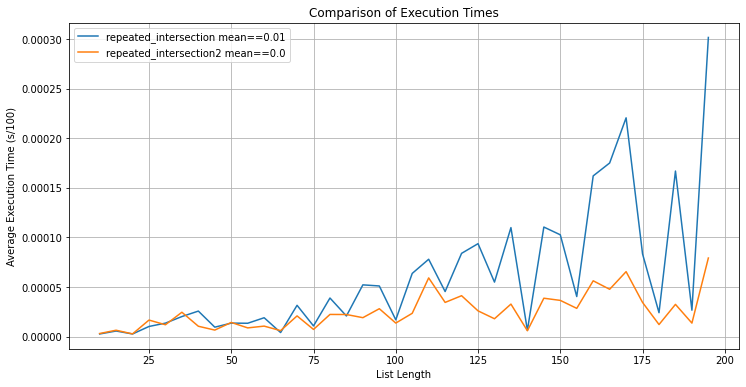

In [25]:
plot_time_process(repeated_intersection, repeated_intersection2,
                  label1='repeated_intersection',
                  label2='repeated_intersection2')

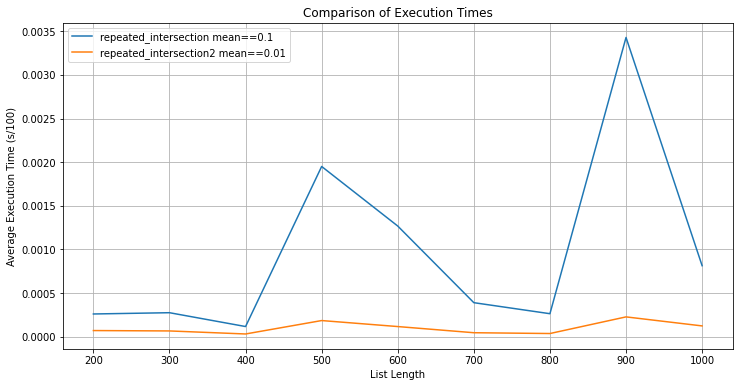

In [26]:
plot_time_process(repeated_intersection, repeated_intersection2, 200, 1001, 100,
                  label1='repeated_intersection',
                  label2='repeated_intersection2')

Вывод 2 по тесту производительности - Задача 2:  
Интересно, а можно увеличить производительность варианта 2 встроенными функциями чтобы он работал быстрее?

In [27]:
def repeated_intersection3(nums1, nums2):
    result = []  # to store the result of intersection
    
    # count occurrences of each number in nums1 using collections.Counter
    nums1_counts = Counter(nums1)

    # Iterate through nums2 and check if the number exists in nums1_counts
    for num in nums2:
        if num in nums1_counts and nums1_counts[num] > 0:
            result.append(num)
            nums1_counts[num] -= 1

    return result

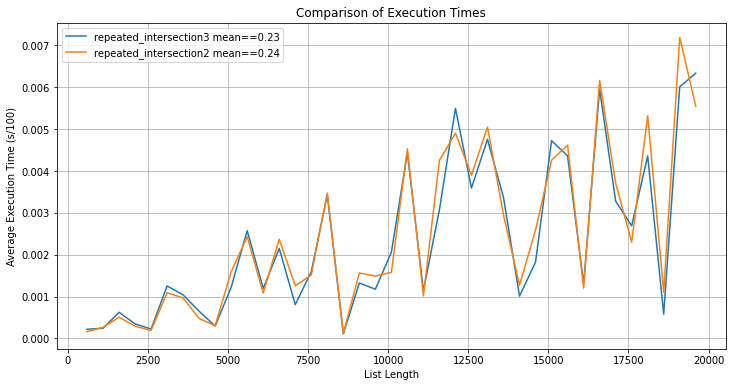

In [28]:
plot_time_process(repeated_intersection3, repeated_intersection2, 600, 20001, 500,
                  label1='repeated_intersection3',
                  label2='repeated_intersection2')

Вывод 3 по тесту производительности - Задача 2:  
Прирост производительности есть, но он незначительный 

### Задача 3

Дана строка, состоящая из букв A-Z (возможно, пустая). Ваша задача - написать функцию RLE (Run-Length Encoding), которая будет преобразовывать эту строку следующим образом: символы будут оставлены без изменений, если они встречаются в строке один раз, и в противном случае к символу будет добавлено количество его повторений. Функция также должна генерировать ошибку, если на вход пришла невалидная строка.

**Пример 1:**  
Вход: "AAAABBBCCXYZDDDDEEEFFFAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBB"  
Выход: "A4B3C2XYZD4E3F3A6B28"

Таким образом, задача заключается в реализации алгоритма кодирования строки в формат RLE и обработке невалидных входных данных

***задача с собеседования Яндекс, почти соответвует задаче с литкод [443 String Compression (Medium)](https://leetcode.com/problems/string-compression/) основное отличие в том, что там на выходе нужно еще выводить длину итогового списка символов. В задаче 4 я разберу оригинал задачи с литкода***


**Решение задачи 2 вариант 1**: с помощью встроенных функции

In [29]:
def rle_str_encoder(s):
    if not s:
        return ''

    encoded = []
    for char, group in itertools.groupby(s):
        _count = len(list(group))
        encoded.append(char if _count == 1 else f'{char}{_count}')

    return ''.join(encoded)

In [30]:
input_string = 'AAAABBBCCXYZDDDDEEEFFFAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBB'
rle_str_encoder(input_string)

'A4B3C2XYZD4E3F3A6B28'

**Решение задачи 2 вариант 2**: без помощи встроенных функции

In [31]:
def rle_str_encoder2(input_str):
    if not input_str:
        return ''

    encoded_str = ''
    count = 1  # initialize a count for current character's repetitions
    prev_char = input_str[0]  # initialize previous character as first character in input string

    for char in input_str[1:]:
        if char == prev_char:
            count += 1  # increment count if current character is same as previous one
        else:
            if count > 1:
                encoded_str += prev_char + str(count)  # add character and its count to encoded string
            else:
                encoded_str += prev_char  # add character without count if it appears only once
            count = 1  # reset count for new character
        prev_char = char  # update previous character

    if count > 1:
        encoded_str += prev_char + str(count)  # add last character and its count to encoded string
    else:
        encoded_str += prev_char  # add last character without count if it appears only once

    return encoded_str


In [32]:
rle_str_encoder2(input_string)

'A4B3C2XYZD4E3F3A6B28'

In [33]:
rle_str_encoder(input_string) == rle_str_encoder2(input_string)

True

**Тест производительности - Задача 3**:

In [34]:
def generate_random_string(total_length, max_repetition):
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    result = []
    
    while total_length > 0:
        char = random.choice(alphabet)  # randomly choose a character from the alphabet
        repetition = random.randint(1, max_repetition)  # generate a random repetition count
        
        # Make sure not to add more characters than needed to reach total_length
        repetition = min(repetition, total_length)
        
        result.append(char * repetition)  # append the character repeated by repetition times
        total_length -= repetition  # update the remaining total_length
    
    return ''.join(result)

In [35]:
generate_random_string(50, 4)

'FKKKYYYYRRRRXXXOOOSSSOOOOMCCCSIIIBBBBBGGIIIIDDDIII'

In [36]:
test_str = generate_random_string(2000, 500)

In [37]:
%timeit -n 100  rle_str_encoder(test_str)

92 µs ± 2.61 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
%timeit -n 100  rle_str_encoder2(test_str)

201 µs ± 45.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Задача 4 - Сжатие строки - 443 String Compression (Medium)

Дан массив символов chars. Сжать его с использованием следующего алгоритма:

1. Создайте пустую строку s.
2. Для каждой группы подряд повторяющихся символов в chars:
   - Если длина группы равна 1, добавьте символ в s.
   - В противном случае, добавьте символ, за которым следует длина группы.
3. Сжатая строка s не должна возвращаться отдельно, а должна быть сохранена в массиве символов chars. Обратите внимание, что длины групп, равные 10 или больше, будут разбиты на несколько символов в массиве chars.
4. После завершения модификации входного массива верните новую длину массива.

Необходимо написать алгоритм, который использует только постоянное количество дополнительной памяти.

**Пример 1:**
Вход: chars = ["a","a","b","b","c","c","c"]
Выход: Вернуть 6, и первые 6 символов входного массива должны быть: ["a","2","b","2","c","3"]
Объяснение: Группы символов "aa", "bb" и "ccc" сжимаются в "a2b2c3".

**Пример 2:**
Вход: chars = ["a"]
Выход: Вернуть 1, и первый символ входного массива должен быть: ["a"]
Объяснение: Единственная группа - это "a", она остается несжатой, так как это одиночный символ.

**Пример 3:**
Вход: chars = ["a","b","b","b","b","b","b","b","b","b","b","b","b"]
Выход: Вернуть 4, и первые 4 символа входного массива должны быть: ["a","b","1","2"].
Объяснение: Группы символов "a" и "bbbbbbbbbbbb" сжимаются в "ab12".

**Ограничения:**
1 <= chars.length <= 2000
chars[i] - это строчная буква английского алфавита, заглавная буква английского алфавита, цифра или символ.

***задача с литкод [443 String Compression (Medium)](https://leetcode.com/problems/string-compression/) привожу ее тут потому что условие на литкод отличается от того что дают на собеседованиях***


**Решение задачи 4**: 

Шаги:
1. добавляем вспомогательный элемент [None] в конец списка chars, чтобы избежать специальной обработки последнего символа
2. используем два указателя, left и right, для прохода по списку. Left будет использоваться для записи, а right - для чтения.
3. отслеживаем текущий символ и его вхождения
4. если символ у указателя right совпадает с текущим символом, увеличиваем счетчик вхождений
5. если они различны, записываем текущий символ и его количество вхождений (если оно больше 1) у указателя left, затем обновляем текущий символ и сбросываем его счетчик
6. соответствующим образом увеличиваем указатель left и перемезаем указатель right к следующему символу
7. возвращаем длину списка chars до указателя left


In [39]:
def compress(chars: List[str]) -> int:
    '''
    Compress the given list of characters using two pointers.

    Time Complexity: O(n)
    Space Complexity: O(1)

    Steps:
    1. Add a sentinel [None] at the end of chars to avoid special handling for the last character.
    2. Use two pointers, left and right, to traverse the list. Left will be for writing while right is for reading.
    3. Keep track of the current character and its count.
    4. If the character at the right pointer is the same as the current character, increment the count.
    5. If they are different, write the current character and its count if greater than 1 at the left pointer, then update the current character and reset its count.
    6. Increment the left pointer accordingly and move the right pointer to the next character.
    7. Return the length of chars up to the left pointer.
    '''
    
    # append sentinel value
    chars.append(None)
    
    left, right = 0, 1
    curr_char = chars[0]
    count = 1

    while right < len(chars):
        if curr_char == chars[right]:
            count += 1
        else:
            chars[left] = curr_char
            left += 1

            # write count if greater than 1
            if count > 1:
                for num in str(count):
                    chars[left] = num
                    left += 1

            # reset current character and its count
            curr_char = chars[right]
            count = 1

        right += 1

    return left



In [40]:
chars = list(input_string[:10])
print(chars)

['A', 'A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'X']


In [41]:
n = compress(chars)
n, chars[:n]

(7, ['A', '4', 'B', '3', 'C', '2', 'X'])

**Тест производительности - Задача 4**:

In [42]:
chars = list(test_str)

In [43]:
%timeit -n 100  compress(chars)

942 µs ± 137 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [44]:
print(chars)

['A', '3', '1', '2', 'G', '2', '9', '0', 'Y', '4', '1', '5', 'X', '2', '2', '7', 'I', '5', '9', '4', 'U', '1', '2', '4', 'X', '3', '9', 'A', '2', '8', '4', 'G', '2', '9', '0', 'Y', '4', '1', '5', 'X', '2', '2', '7', 'I', '5', '9', '4', 'U', '1', '2', '4', 'X', '3', '9', 'A', '2', '5', '7', 'G', '2', '9', '0', 'Y', '4', '1', '5', 'X', '2', '2', '7', 'I', '5', '9', '4', 'U', '1', '2', '4', 'X', '3', '9', 'A', '2', '3', '0', 'G', '2', '9', '0', 'Y', '4', '1', '5', 'X', '2', '2', '7', 'I', '5', '9', '4', 'U', '1', '2', '4', 'X', '3', '9', 'A', '2', '0', '3', 'G', '2', '9', '0', 'Y', '4', '1', '5', 'X', '2', '2', '7', 'I', '5', '9', '4', 'U', '1', '2', '4', 'X', '3', '9', 'A', '1', '7', '6', 'G', '2', '9', '0', 'Y', '4', '1', '5', 'X', '2', '2', '7', 'I', '5', '9', '4', 'U', '1', '2', '4', 'X', '3', '9', 'A', '1', '4', '9', 'G', '2', '9', '0', 'Y', '4', '1', '5', 'X', '2', '2', '7', 'I', '5', '9', '4', 'U', '1', '2', '4', 'X', '3', '9', 'A', '1', '2', '2', 'G', '2', '9', '0', 'Y', '4', '1',

Runtime == 59ms (Beats 88.76%of users with Python3)  
Memory (Beats 65.40%of users with Python3)

### Задача 5 -  Свертка списка чисел в их диапазоны 

Дан список целых чисел, в котором нет повторяющихся элементов. Необходимо преобразовать этот список в строку, сворачивая последовательные числа в диапазоны.  

Входные данные:  
- Список целых чисел nums длиной \(n\) (1 ≤ \(n\) ≤ 10^5), где каждое число \(a_i\) удовлетворяет условию (-10^9 ≤ \(a_i\) ≤ 10^9). В списке нет повторяющихся элементов.  
Выходные данные:  
- Строка, представляющая собой диапазоны чисел. Если числа идут последовательно, они представляются в виде диапазона (например, '1-4'). Если числа не соседние, они разделяются запятой (например, '1,4').  

**Примеры:**  
1. Вход: [1,4,5,2,3,9,8,11,0]  
   Выход: '0-5,8-9,11'  

2. Вход: [1,4,3,2]  
   Выход: '1-4'  

3. Вход: [1,4]  
   Выход: '1,4'  

***задача с собеседования Яндекс, почти соответвует задаче с литкод [228 Summary Ranges (Easy)](https://leetcode.com/problems/summary-ranges/) основное отличие в том, что на выходе подается уже отсортированный список и на выходе возвращаем список из строк. В следующей задаче 6 я разберу оригинал задачи с литкода***

При решении этой задачи разрешено использовать встроенную сортировку и join и map, поэтому тут не рассматриваются разные решения со встроенными функциями и без них. Если у вас есть более оптимальное решение можете законтрибьютить с тестом

**Решение задачи 5 вариант 1**:
1. Сначала отсортируем список.
2. Затем пройдемся по списку и будем искать последовательные числа.
3. Если мы находим последовательные числа, мы начинаем формировать диапазон.
4. Если числа не последовательные, мы завершаем текущий диапазон и начинаем новый.

In [45]:
def convert_to_ranges(nums):
    if not nums:
        return ''

    # sort list
    nums.sort()

    # function to group consecutive numbers
    def group_consecutive(nums):
        ranges = []
        for e in nums:
            if not ranges or e > ranges[-1][-1] + 1:
                ranges.append([e])
            else:
                ranges[-1].append(e)
        return ranges

    # convert groups of numbers to string
    def range_to_str(r):
        if len(r) == 1:
            return str(r[0])
        else:
            return f'{r[0]}-{r[-1]}'

    ranges = group_consecutive(nums)
    return ','.join(map(range_to_str, ranges))

In [46]:
convert_to_ranges([1,4,5,2,3,9,8,11,0])

'0-5,8-9,11'

**Решение задачи 5 вариант 2**:  
такой же принцип только используем два указателя чтобы сразу записывать рпавильную форму в строку и не использоать join после цикла

In [47]:
def convert_to_ranges2(nums):
    if not nums:
        return ''

    # sort the list
    nums.sort()

    # initialize the start and end values of the range
    start, end = nums[0], nums[0]
    result = ''

    for num in nums[1:]:
        # if the current number is consecutive to the previous one
        if num == end + 1:
            end = num
        else:
            # if it was a range of more than one number
            if start != end:
                result += f'{start}-{end},'
            else:
                result += str(start) + ','
            start, end = num, num

    # add the last range or number
    if start != end:
        result += f'{start}-{end},'
    else:
        result += str(start) + ','

    return result[:-1]

In [48]:
convert_to_ranges2([1,4,5,2,3,9,8,11,0])

'0-5,8-9,11'

In [49]:
convert_to_ranges([1,4,5,2,3,9,8,11,0]) == convert_to_ranges2([1,4,5,2,3,9,8,11,0])

True

**Тест производительности - Задача 5**:  
Мы будем использовать отсортированный список чтобы производительность была O(n) и разницу текущей производительности вариантов можно было отследить лучше

In [50]:
def generate_unique_sorted_list(n, max_len_range):
    '''
    Generates a list of length n of unique sorted numbers.
    '''
    result = []
    current_num = 1

    while len(result) < n:
        # generate segment length (not exceeding the remaining space to n)
        segment_length = random.randint(1, max_len_range)

        # add the segment to the result
        for _ in range(segment_length):
            result.append(current_num)
            current_num += 1

        # generate gap length (can be 0)
        gap_length = random.randint(0, max_len_range)

        # increase the current number by the gap length
        current_num += gap_length

    return result[:n]


In [51]:
test_nums = generate_unique_sorted_list(1000,40)
print(test_nums[:40])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]


In [52]:
%timeit -n 1000  convert_to_ranges(test_nums)

308 µs ± 35.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [53]:
%timeit -n 1000  convert_to_ranges2(test_nums)

122 µs ± 14.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Вывод по тесту производительности - Задача 5:  
Второй вариант в котором мы сразу пишем правильные значения в строку и не используем второй цикл через join работает быстрее 

### Задача 6 - Свертка диапазонов - 228 Summary Ranges (Easy)

Дан отсортированный уникальный массив целых чисел nums.  
Диапазон [a,b] представляет собой набор всех целых чисел от a до b (включительно).  
Верните наименьший отсортированный список диапазонов, который полностью покрывает все числа в массиве. То есть каждый элемент `nums` покрывается ровно одним из диапазонов, и не существует такого целого числа x, что x находится в одном из диапазонов, но не в `nums`.

Каждый диапазон [a,b] в списке должен быть представлен как:  
- "a->b", если a != b  
- "a", если a == b  

**Примеры:**  
1. Вход: nums = [0,1,2,4,5,7]  
   Выход: ["0->2","4->5","7"]  
   Объяснение: Диапазоны:  
   [0,2] --> "0->2"  
   [4,5] --> "4->5"  
   [7,7] --> "7"  

2. Вход: nums = [0,2,3,4,6,8,9]  
   Выход: ["0","2->4","6","8->9"]  
   Объяснение: Диапазоны:  
   [0,0] --> "0"  
   [2,4] --> "2->4"  
   [6,6] --> "6"  
   [8,9] --> "8->9"  

**Ограничения:**

- 0 <= длина(nums) <= 20
- -2^31 <= nums[i] <= 2^31 - 1
- все значения в nums уникальны.
- nums отсортирован по возрастанию.

***задача с литкод [228 Summary Ranges (Easy)](https://leetcode.com/problems/summary-ranges/) привожу ее тут потому что условие на литкод отличается от того, что дают на собеседованиях***


**Решение задачи 6**:  
такой же принцип решения как у задачи 5 только используем два указателя чтобы сразу записывать правильную форму в список и не использоать второй цикл, потому что этот вариант оказался быстрее по результатам задачи 5

In [54]:
def summaryRanges(nums: List[int]) -> List[str]:
    if not nums:
        return []

    res = []
    start = nums[0]
    end = nums[0]

    for i in range(1, len(nums)):
        if nums[i] == end + 1:
            end = nums[i]
        else:
            if start == end:
                res.append(str(start))
            else:
                res.append(f'{start}->{end}')
            start = end = nums[i]

    if start == end:
        res.append(str(start))
    else:
        res.append(f'{start}->{end}')

    return res

In [55]:
summaryRanges([0,2,3,4,6,8,9])

['0', '2->4', '6', '8->9']

Runtime == 33ms (Beats 85.34%of users with Python3)  
Memory (Beats 17.87%of users with Python3)

### Задача 7 -  Максимальная последовательность единиц при одной замене 

Дан бинарный массив. Вам нужно найти максимальную длину последовательных единиц, которую вы можете получить, заменив ровно один 0 на 1.

**Примеры:**
1. Вход: [1,0,1,1,0]  
   Вывод: 4  
   Объяснение: Замените первый 0 на 1, массив станет [1,1,1,1,0].  

2. Вход: [1,0,1,1,0,1]  
   Вывод: 5  
   Объяснение: Замените второй 0 на 1, массив станет [1,0,1,1,1,1].  

***задача с собеседования Яндекс, соответвует задаче с литкод [487 Max Consecutive Ones II (Medium)](https://leetcode.com/problems/max-consecutive-ones-ii/)***

**Решение задачи 7 вариант 1**:
1. Инициализация:
  - Установите два указателя left и right в начало массива.
  - Создайте переменную max_ones для отслеживания максимального количества последовательных единиц.
  - Создайте переменную zero_count для отслеживания количества нулей в текущем окне.
2. Скользящее окно:
  - Расширяйте правый указатель right на один шаг вправо на каждой итерации.
  - Если текущий элемент под указателем right равен 0, увеличьте zero_count.
  - Пока zero_count больше 1, сдвигайте левый указатель left вправо и уменьшайте zero_count, если элемент под указателем left равен 0.
  - Обновите max_ones, установив его равным максимальному значению между max_ones и разницей между right и left плюс 1 (размер текущего окна).
3. Результат:
  - После завершения обхода массива max_ones будет содержать максимальное количество последовательных единиц, которое можно получить, заменив ровно один 0 на 1.
4. Обработка пограничных значений:
  - если длина меньше 2 возвращай длину
  - если сумма больше длинны списка минус 2 возвращай длинну

In [56]:
def find_max_consecutive_ones(nums):
    if len(nums) < 2 or np.sum(nums) > len(nums) - 2:
        return len(nums)

    left = 0
    zero_count = 1 - nums[0]
    max_ones = 1

    for right in range(1, len(nums)):
        if nums[right] == 0:
            zero_count += 1

        while zero_count > 1:
            if nums[left] == 0:
                zero_count -= 1
            left += 1

        max_ones = max(max_ones, right - left + 1)

    return max_ones

In [57]:
nums = []
find_max_consecutive_ones(nums)

0

In [58]:
nums = [0]
find_max_consecutive_ones(nums)

1

In [59]:
nums = [1, 0, 1, 1, 0, 1, 1]
find_max_consecutive_ones(nums)

5

In [60]:
nums = [1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0]
find_max_consecutive_ones(nums)

6

In [61]:
nums[::-1]

[0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]

In [62]:
find_max_consecutive_ones(nums[::-1])

6

In [63]:
find_max_consecutive_ones([1] * 10)

10

In [64]:
find_max_consecutive_ones([0]+ ([1] * 10)), find_max_consecutive_ones(([1] * 10) + [0])

(11, 11)

In [65]:
def find_max_consecutive_ones2(nums):
    if len(nums) < 2 or np.sum(nums) > len(nums) - 2:
        return len(nums)

    max_ones = 0
    curr_ones = 0
    most_recent_zero = -1
    ones_before_recent_zero = 0

    for i in range(len(nums)):
        if nums[i] == 1:
            curr_ones += 1
        else:
            if most_recent_zero != -1:
                max_ones = max(max_ones, curr_ones + ones_before_recent_zero + 1)
            else:
                max_ones = max(max_ones, curr_ones)

            ones_before_recent_zero = curr_ones
            curr_ones = 0
            most_recent_zero = i

    max_ones = max(max_ones, curr_ones)

    return max_ones

In [66]:
find_max_consecutive_ones2(nums)

6

In [67]:
def generate_binary_list(length):
    return [random.choice([0, 1]) for _ in range(length)]

In [68]:
binary_list = generate_binary_list(1000)
binary_list[:20]

[0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]

In [69]:
find_max_consecutive_ones(binary_list)

12

In [70]:
%timeit -n 1000  find_max_consecutive_ones(binary_list)

641 µs ± 134 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [71]:
%timeit -n 1000  find_max_consecutive_ones2(binary_list)

314 µs ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
